## Data cleaning and wrangling 

#### Initial review - shape, type and content

In [542]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
import warnings
pd.set_option('display.max_rows', 100)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [543]:
from scipy.stats import chi2_contingency

In [544]:
# read data
data = pd.read_csv("C:/Users/ivanr/OneDrive/Radna površina/zomato_dataset.csv")

In [545]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [546]:
data.head()

,res_id,name,type,address,city,locality,latitude,longitude,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,votes,photo_count,opentable_support,delivery,state,area
0,3400299,Bikanervala,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,814,154,0.0,0,Uttar Pradesh,240928
1,3400005,Mama Chicken Mama Franky House,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,1203,161,0.0,0,Uttar Pradesh,240928
2,3401013,Bhagat Halwai,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,"Fast Food, Mithai",9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,801,107,0.0,1,Uttar Pradesh,240928
3,3400290,Bhagat Halwai,Quick Bites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,693,157,0.0,1,Uttar Pradesh,240928
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,470,291,0.0,1,Uttar Pradesh,240928


In [547]:
data.shape

(53756, 20)

In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53756 entries, 0 to 53755
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                53756 non-null  int64  
 1   name                  53756 non-null  object 
 2   type                  52085 non-null  object 
 3   address               53738 non-null  object 
 4   city                  53756 non-null  object 
 5   locality              53756 non-null  object 
 6   latitude              53756 non-null  float64
 7   longitude             53756 non-null  float64
 8   cuisines              53406 non-null  object 
 9   timings               52894 non-null  object 
 10  average_cost_for_two  53756 non-null  int64  
 11  price_range           53756 non-null  int64  
 12  highlights            53756 non-null  object 
 13  aggregate_rating      53756 non-null  float64
 14  votes                 53756 non-null  int64  
 15  photo_count        

In [549]:
data.isna().sum()/len(data)*100

res_id                  0.000000
name                    0.000000
type                    3.108490
address                 0.033485
city                    0.000000
locality                0.000000
latitude                0.000000
longitude               0.000000
cuisines                0.651090
timings                 1.603542
average_cost_for_two    0.000000
price_range             0.000000
highlights              0.000000
aggregate_rating        0.000000
votes                   0.000000
photo_count             0.000000
opentable_support       0.031624
delivery                0.000000
state                   0.000000
area                    0.000000
dtype: float64

Data do not have too many null values so we can see which one we can easly fill out and which is better to drop.

In [550]:
for col in data.select_dtypes(np.object).columns:
    print("column name: ", col)
    print(data[col].value_counts())
    print('\n')        

column name:  name
Domino's Pizza                      360
Cafe Coffee Day                     289
KFC                                 237
Keventers                           196
Subway                              183
                                   ... 
Masterchef Chinese Cuisine            1
Addy's Biryani and 65 Center          1
Hotel Keshavi- Dum Biryani House      1
Purohit Sweet Center                  1
Sardar Ji Dhaba                       1
Name: name, Length: 35940, dtype: int64


column name:  type
Quick Bites        13609
Casual Dining      11912
Café                4047
Dessert Parlour     3511
Bakery              3411
Sweet Shop          2578
Beverage Shop       2320
Fine Dining         1479
Food Court          1460
Bar                 1380
Dhaba               1227
Kiosk               1151
Lounge               849
Food Truck           818
Bhojanalya           625
Mess                 380
Pub                  370
Paan Shop            333
Confectionery        205
Butch

C:\Users\ivanr\AppData\Local\Temp\ipykernel_13692\2988637728.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



By observing value counts of different categorical columns i notice that:

-we can use column name to check is restaurant chain or its not, make a new column that can be useful in our model.

-type can be grouped

-column cuisines needs to be cleaned 

-timings and highlights can be challenging to work on, so we need to see how to deal with it and get important values

In [551]:
def split_numerical(data, threshold=20):
    numericals = data.select_dtypes(np.number)
    cont_columns = [col for col in numericals.columns 
        if len(numericals[col].unique()) > threshold]
    disc_columns = [col for col in numericals.columns 
        if len(numericals[col].unique()) <= threshold]
    num_cont = data.loc[:, cont_columns]
    num_disc = data.loc[:, disc_columns]
    return num_cont, num_disc

num_cont, num_disc = split_numerical(data)

In [552]:
for col in num_disc.columns:
    print("column name: ", col)
    print(num_disc[col].value_counts())
    print('\n')

column name:  price_range
1    27645
2    16260
3     7290
4     2561
Name: price_range, dtype: int64


column name:  opentable_support
0.0    53739
Name: opentable_support, dtype: int64


column name:  delivery
0    36053
1    17703
Name: delivery, dtype: int64




In [553]:
data['average_cost_for_two'].value_counts()

300    6217
200    6212
400    5082
500    4585
100    4417
       ... 
320       1
15        1
420       1
620       1
880       1
Name: average_cost_for_two, Length: 138, dtype: int64

We have potential correlation between price range and average cost for two.


In [554]:
data_duplicates=data.duplicated()
data_duplicates.sum()

490

In [555]:
data = data.drop_duplicates().reset_index()

In [556]:
data.nunique()

index                   53266
res_id                  48607
name                    35940
type                       26
address                 44758
city                       76
locality                 3323
latitude                46691
longitude               46650
cuisines                 8327
timings                  7003
average_cost_for_two      138
price_range                 4
highlights              28057
aggregate_rating           33
votes                    2627
photo_count              2504
opentable_support           1
delivery                    2
state                      24
area                       24
dtype: int64

In [557]:
data.shape

(53266, 21)

In [558]:
data.columns

Index(['index', 'res_id', 'name', 'type', 'address', 'city', 'locality',
       'latitude', 'longitude', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'highlights', 'aggregate_rating', 'votes', 'photo_count',
       'opentable_support', 'delivery', 'state', 'area'],
      dtype='object')

In [559]:
# changing column name 
data = data.rename(columns={'aggregate_rating': 'rating'})


In [560]:
data = data.rename(columns={'average_cost_for_two': 'cost'})


In [561]:
data.dtypes

index                  int64
res_id                 int64
name                  object
type                  object
address               object
city                  object
locality              object
latitude             float64
longitude            float64
cuisines              object
timings               object
cost                   int64
price_range            int64
highlights            object
rating               float64
votes                  int64
photo_count            int64
opentable_support    float64
delivery               int64
state                 object
area                   int64
dtype: object

All data types looks correct and for now, we will keep it like it is.

In [562]:
categorical = data.select_dtypes(np.object)
numerical = data.select_dtypes(np.number)

C:\Users\ivanr\AppData\Local\Temp\ipykernel_13692\1952071912.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

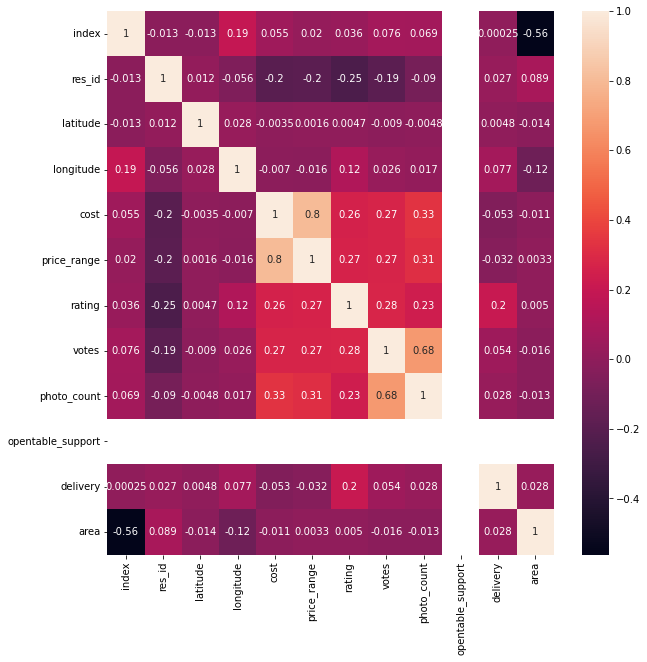

In [563]:
cor_matrix = numerical.corr()
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(cor_matrix, annot=True)

### By initial reviewing data set i decided to apply next steps:

Drop columns index and res_id because they are irrelevante for model.

In [564]:
data = data.drop(['index', 'res_id'], axis=1)

Drop columns  open table support because it have only one value 

In [565]:
data = data.drop(['opentable_support'], axis=1)

###### We have moderate to high correlation between photo count and votes which is to be expected, because they both can represent popularity of the restaurants. However they both look clean so we can  make decision later should we keep them both or one of them.

###### Also, we have high correlation between price range and cost for two. I decided to drop average cost for two:

In [566]:
data = data.drop(['cost'], axis=1)

Every state have unique area code so they both represent same thing. We can drop one of two columns.

In [567]:
data = data.drop(['state'], axis=1)

Let's make new column to mark chain and non-chain restaurants.

In [568]:
def mark_chain_restaurant(df, name_column, threshold=5):
   
    name_counts = df[name_column].value_counts()
    chains = name_counts[name_counts >= threshold].index
    df['chain_restaurant'] = df[name_column].apply(lambda x: 1 if x in chains else 0)
    
    return df
    

In [569]:
mark_chain_restaurant(data, 'name')

,name,type,address,city,locality,latitude,longitude,cuisines,timings,price_range,highlights,rating,votes,photo_count,delivery,area,chain_restaurant
0,Bikanervala,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,814,154,0,240928,1
1,Mama Chicken Mama Franky House,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,1203,161,0,240928,0
2,Bhagat Halwai,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,"Fast Food, Mithai",9:30 AM to 11 PM,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,801,107,1,240928,1
3,Bhagat Halwai,Quick Bites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,693,157,1,240928,1
4,The Salt Cafe Kitchen & Bar,Casual Dining,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,470,291,1,240928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53261,Shimla Cafe,Quick Bites,"Guddumal Building, Sanjauli Chowk, Near Dispen...",Shimla,Sanjauli,31.103496,77.190923,Fast Food,10 AM to 10 PM,1,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",3.2,4,0,1,55673,0
53262,Cafe Shimla Heart,Café,"Engine Ghar,Sanjauli,Shimla",Shimla,Sanjauli,31.102722,77.191692,"North Indian, Continental, Chinese, Fast Food",9am – 10pm (Mon-Sun),1,"['Cash', 'Debit Card', 'Takeaway Available', '...",0.0,3,7,1,55673,0
53263,Yours Chinese Food,Casual Dining,"Shop 8, Sunbruze Building, Sanjauli Local Bus ...",Shimla,Sanjauli,31.103098,77.192003,"Chinese, Fast Food",11 AM to 10 PM,1,"['Delivery', 'Cash', 'Takeaway Available', 'In...",0.0,3,0,1,55673,0
53264,Mehfil Restaurant,Bar,"Circular Road, Sanjauli, Shimla (H.P)",Shimla,Sanjauli,31.103024,77.197080,"North Indian, Chinese",10 AM to 10 PM,2,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",0.0,3,6,1,55673,1


In [570]:
data = mark_chain_restaurant(data, 'name')

We can drop column name now.

In [571]:
data = data.drop(['name'], axis=1)

In [572]:
data.head(20)

,type,address,city,locality,latitude,longitude,cuisines,timings,price_range,highlights,rating,votes,photo_count,delivery,area,chain_restaurant
0,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,814,154,0,240928,1
1,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,1203,161,0,240928,0
2,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,"Fast Food, Mithai",9:30 AM to 11 PM,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,801,107,1,240928,1
3,Quick Bites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,693,157,1,240928,1
4,Casual Dining,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,470,291,1,240928,0
5,Quick Bites,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,Civil Lines,27.201516,78.007556,"Pizza, Fast Food",10:57 AM to 11 PM,2,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,707,62,0,240928,1
6,Quick Bites,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,Dayal Bagh,27.222175,78.010174,"North Indian, Fast Food, Chinese, South Indian","11am – 10:35pm (Mon, Tue, Wed, Fri, Sat), 11am...",2,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,647,46,1,240928,0
7,Quick Bites,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,Sikandra,27.203930,77.954260,"Pizza, Fast Food",10:57 AM to 11 PM,2,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,617,18,0,240928,1
8,Bakery,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,Civil Lines,27.204148,78.009025,"Bakery, Fast Food",9 AM to 9 PM,2,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,322,14,1,240928,1
9,Café,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,Tajganj,27.158243,78.045591,"Cafe, Chinese, Continental, Italian, Bakery, D...","12midnight – 1am, 11:30am – 12midnight (Mon-Sun)",3,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,289,324,1,240928,0


I will group type column. Also this will fix null values by marking it with 'others' which is good approach because we dont have actual info of type.

In [573]:
def group_type(type):
    if type in ['Fine Dining', 'Cocktail Bar', 'Club', 'Lounge']:
        return 'Fine Dining'
    elif type in ['Bar', 'Pub', 'Microbrewery']:
        return 'Bar'
    elif type in ['Café', 'Bakery', 'Sweet Shop', 'Confectionery', 'Irani Cafe', 'Dessert Parlour', 'Beverage Shop']:
        return 'Café/Bakery'
    elif type in ['Quick Bites', 'Dhaba', 'Kiosk', 'Food Truck',  'Paan Shop', 'Pop up', 'Shack']:
        return 'Quick Bites'
    elif type in ['Casual Dining',   'Food Court', 'Bhojanalya', 'Mess']:
        return 'Casual Dining'
    else:
        return 'Other'


In [574]:
data['type'] = data['type'].apply(group_type)


In [575]:
data['type'].value_counts()

Quick Bites      17062
Café/Bakery      15973
Casual Dining    14227
Fine Dining       2387
Bar               1812
Other             1805
Name: type, dtype: int64

Now i will try to deal with column 'cuisines'

In [576]:
data['cuisines'].value_counts()

North Indian                                                 4191
Fast Food                                                    1932
North Indian, Chinese                                        1583
Bakery                                                       1441
South Indian                                                 1230
                                                             ... 
South Indian, Fast Food, Desserts, Beverages, Street Food       1
American, Fast Food, Burger, Salad                              1
Fast Food, Street Food, Pizza, Momos, Beverages                 1
Fast Food, Rolls, Burger, Salad, Wraps                          1
North Indian, Modern Indian, American, Afghan                   1
Name: cuisines, Length: 8327, dtype: int64

In [577]:
cuisines_list = data['cuisines'].unique()
print(cuisines_list)


['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Bakery, Beverages, Chinese, Coffee, Continental, Desserts, Fast Food, North Indian'
 'Beverages, Fast Food, French, Modern Indian, Mughlai, North Indian'
 'North Indian, Modern Indian, American, Afghan']


In [578]:
data['cuisines'] = data['cuisines'].str.strip()


In [579]:
cuisine_list = data['cuisines'].str.split(",").explode()


In [580]:
cuisine_counts = cuisine_list.value_counts()
print(cuisine_counts.head(10))


North Indian     12665
 Chinese          9653
 Fast Food        7891
 North Indian     6170
 Desserts         4575
 Beverages        4432
Fast Food         4153
 Continental      3683
Bakery            3477
Cafe              3099
Name: cuisines, dtype: int64


In [581]:
cuisine_counts = data['cuisines'].str.strip().str.split(", ").explode().groupby(level=0).value_counts().rename('count')
cuisine_counts = cuisine_counts.reset_index().groupby('cuisines')['count'].sum().sort_values(ascending=False)


In [583]:
cuisine_counts.head(10)

cuisines
North Indian    18835
Chinese         12346
Fast Food       12044
Desserts         6999
Beverages        6731
South Indian     5706
Continental      4913
Bakery           4443
Cafe             4098
Italian          3845
Name: count, dtype: int64

In [584]:
type(cuisine_counts)

pandas.core.series.Series

In [585]:
data = data.dropna()

In [586]:
data.isnull().sum()

type                0
address             0
city                0
locality            0
latitude            0
longitude           0
cuisines            0
timings             0
price_range         0
highlights          0
rating              0
votes               0
photo_count         0
delivery            0
area                0
chain_restaurant    0
dtype: int64

In [587]:
data.shape

(52173, 16)

In [588]:
data.reset_index()

,index,type,address,city,locality,latitude,longitude,cuisines,timings,price_range,highlights,rating,votes,photo_count,delivery,area,chain_restaurant
0,0,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,814,154,0,240928,1
1,1,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,1203,161,0,240928,0
2,2,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,"Fast Food, Mithai",9:30 AM to 11 PM,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,801,107,1,240928,1
3,3,Quick Bites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,693,157,1,240928,1
4,4,Casual Dining,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,470,291,1,240928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52168,53261,Quick Bites,"Guddumal Building, Sanjauli Chowk, Near Dispen...",Shimla,Sanjauli,31.103496,77.190923,Fast Food,10 AM to 10 PM,1,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",3.2,4,0,1,55673,0
52169,53262,Café/Bakery,"Engine Ghar,Sanjauli,Shimla",Shimla,Sanjauli,31.102722,77.191692,"North Indian, Continental, Chinese, Fast Food",9am – 10pm (Mon-Sun),1,"['Cash', 'Debit Card', 'Takeaway Available', '...",0.0,3,7,1,55673,0
52170,53263,Casual Dining,"Shop 8, Sunbruze Building, Sanjauli Local Bus ...",Shimla,Sanjauli,31.103098,77.192003,"Chinese, Fast Food",11 AM to 10 PM,1,"['Delivery', 'Cash', 'Takeaway Available', 'In...",0.0,3,0,1,55673,0
52171,53264,Bar,"Circular Road, Sanjauli, Shimla (H.P)",Shimla,Sanjauli,31.103024,77.197080,"North Indian, Chinese",10 AM to 10 PM,2,"['Dinner', 'Cash', 'Lunch', 'Takeaway Availabl...",0.0,3,6,1,55673,1


In [589]:
cuisine_list = cuisine_counts.index.tolist()
print(cuisine_list)


['North Indian', 'Chinese', 'Fast Food', 'Desserts', 'Beverages', 'South Indian', 'Continental', 'Bakery', 'Cafe', 'Italian', 'Street Food', 'Mithai', 'Biryani', 'Ice Cream', 'Pizza', 'Mughlai', 'Burger', 'Sandwich', 'Finger Food', 'Asian', 'Juices', 'Momos', 'Seafood', 'Rolls', 'Mexican', 'Salad', 'Thai', 'American', 'Healthy Food', 'Maharashtrian', 'European', 'Kerala', 'Kebab', 'Arabian', 'BBQ', 'Indian', 'Gujarati', 'Tea', 'Paan', 'Andhra', 'Mediterranean', 'Rajasthani', 'Modern Indian', 'Coffee', 'Japanese', 'Lebanese', 'Bengali', 'Chettinad', 'Wraps', 'Bar Food', 'Mishti', 'Hyderabadi', 'Raw Meats', 'Tibetan', 'Mangalorean', 'Sushi', 'Afghan', 'Steak', 'Malaysian', 'Awadhi', 'Vietnamese', 'Lucknowi', 'Roast Chicken', 'Malwani', 'French', 'Korean', 'Parsi', 'Burmese', 'Kashmiri', 'Goan', 'Middle Eastern', 'Assamese', 'Bihari', 'Tex-Mex', 'Turkish', 'Cuisine Varies', 'Konkan', 'Drinks Only', 'North Eastern', 'Bubble Tea', 'Cantonese', 'Indonesian', 'Spanish', 'Greek', 'Iranian', 'C

In [590]:
len(cuisine_list)

131

In [591]:
cuisine_list[:20]

['North Indian',
 'Chinese',
 'Fast Food',
 'Desserts',
 'Beverages',
 'South Indian',
 'Continental',
 'Bakery',
 'Cafe',
 'Italian',
 'Street Food',
 'Mithai',
 'Biryani',
 'Ice Cream',
 'Pizza',
 'Mughlai',
 'Burger',
 'Sandwich',
 'Finger Food',
 'Asian']

In [592]:
indian =  ['North Indian', 'South Indian', 'Biryani', 'Mughlai', 'Maharashtrian', 'Kerala', 'Andhra', 'Chettinad', 'Hyderabadi', 'Goan', 'Lucknowi', 'Modern Indian', 'Konkan', 'Oriya', 'Sindhi', 'Tamil']
asian = ['Chinese', 'Japanese', 'Korean', 'Vietnamese', 'Thai']
western = ['Italian', 'American', 'French', 'British', 'Spanish', 'Greek', 'Portuguese', 'German', 'Belgian', 'Irish', 'Swedish', 'Australian']
middle_eastern =  ['Lebanese', 'Turkish', 'Iranian', 'Arabian']
fast_food = ['Fast Food', 'Burger', 'Ice Cream', 'Pizza', 'Sandwich', 'Finger Food', 'Bar Food', 'Hot dogs', 'Falafel', 'Fried Chicken', 'Street Food']
others = ['Desserts', 'Beverages', 'Bakery', 'Cafe', 'Salad', 'Healthy Food', 'Fusion', 'International', 'Cuisine Varies']

In [593]:
def assign_cuisine_type(cuisine, cuisine_list):
    if any(item in cuisine for item in cuisine_list):
        return 1
    else:
        return 0

data['indian'] = data['cuisines'].apply(lambda x: assign_cuisine_type(x, indian))
data['asian'] = data['cuisines'].apply(lambda x: assign_cuisine_type(x, asian))
data['western'] = data['cuisines'].apply(lambda x: assign_cuisine_type(x, western))
data['middle_eastern'] = data['cuisines'].apply(lambda x: assign_cuisine_type(x, middle_eastern))
data['fast_food'] = data['cuisines'].apply(lambda x: assign_cuisine_type(x, fast_food))
data['others'] = data['cuisines'].apply(lambda x: assign_cuisine_type(x, others))



In [594]:
data = data.drop('cuisines', axis = 1)

After working with 'cuisine' column, we have 6 new columns where each one of them contains a 1 if the corresponding cuisine type is present in the cuisines column, and a 0 if it is not.

For working highlight column i choose to count total number of highlights for each restaurant and make new column 'highlights_count' that can bring value for our model.

In [595]:
data['highlights_count'] = data['highlights'].apply(lambda x: len(x.split(', ')))

In [596]:
data['highlights'][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

In [597]:
data = data.drop('highlights', axis = 1)

In [598]:
data.head()

,type,address,city,locality,latitude,longitude,timings,price_range,rating,votes,photo_count,delivery,area,chain_restaurant,indian,asian,western,middle_eastern,fast_food,others,highlights_count
0,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,Khandari,27.211450,78.002381,8:30am – 10:30pm (Mon-Sun),2,4.4,814,154,0,240928,1,1,0,0,0,1,1,8
1,Quick Bites,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,Agra Cantt,27.160569,78.011583,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",2,4.4,1203,161,0,240928,0,1,1,0,0,1,0,7
2,Quick Bites,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,Shahganj,27.182938,77.979684,9:30 AM to 11 PM,1,4.2,801,107,1,240928,1,0,0,0,0,1,0,14
3,Quick Bites,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,Civil Lines,27.205668,78.004799,8am – 11pm (Mon-Sun),1,4.3,693,157,1,240928,1,1,0,0,0,1,1,11
4,Casual Dining,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,Tajganj,27.157709,78.052421,11:30 AM to 11:30 PM,3,4.9,470,291,1,240928,0,1,0,1,0,0,0,27


In [600]:
## dropping  columns 

In [599]:
data['locality'].value_counts()

Civil Lines                        787
Model Town                         458
CIDCO                              442
Shastri Nagar                      407
Vijay Nagar                        393
                                  ... 
Vivira Mall, Navallur                1
Chennai Food Town, Thuraipakkam      1
Keys Hotel, Thiruvanmiyur            1
Grand Residence Hotel, Porur         1
Mehli                                1
Name: locality, Length: 3318, dtype: int64

In [601]:
data = data.drop(['timings', 'address', 'locality'], axis = 1  )

Since price_range contain values from 1-4 where 1 represent low price restaurant and 4 high, i decided to change column type from int to object type because it can be more valuable that way.

In [602]:
data['price_range'] = data['price_range'].astype('object')

Column area is discrete numerical column and it would be better to change type to categorical.

In [603]:
data['area'] = data['area'].astype('object')

Since our target is  'rating' let's try to better understand that column.

In [604]:
data['rating'].value_counts()

0.0    7520
3.9    3612
4.0    3534
3.8    3445
3.7    3256
4.1    2985
3.6    2855
3.5    2583
3.4    2510
3.3    2417
4.2    2408
3.2    2355
4.3    1826
3.1    1581
3.0    1442
2.9    1370
4.4    1229
2.8    1058
4.5     805
2.7     758
4.6     534
2.6     526
2.5     368
4.7     301
2.4     282
4.8     180
2.3     171
4.9     159
2.2      60
2.1      27
2.0      10
1.9       4
1.8       2
Name: rating, dtype: int64

In [605]:
num_zero_ratings = len(data[data["rating"] == 0.0])
total_records = len(data)
percent_zero_ratings = (num_zero_ratings / total_records) * 100
print("Percentage of 0.0 ratings: ", percent_zero_ratings, "%")

Percentage of 0.0 ratings:  14.413585571080828 %


This can potentially affect the performance of our model as the missing values can introduce bias and affect the accuracy of the predictions. Let's check number of votes for restaurants with 0.0 rating because they can be non-rated.

In [606]:
zero_ratings = data[data['rating'] == 0.0]

In [607]:
zero_ratings['votes'].value_counts()

0    3005
1    1895
2    1374
3    1246
Name: votes, dtype: int64

Based on this information, it seems that the majority of the restaurants with 0.0 rating also have extremly small amount of  votes. This suggests that these restaurants may not have received enough feedback to accurately determine their rating. It may be worth considering filtering out restaurants with very low numbers of votes in order to improve the quality of  dataset and the accuracy of  model. Decision is to drop record with 0 and 1 vote.

In [608]:
data = data.drop(data[(data['rating'] == 0.0) & (data['votes'] <= 1)].index)
data = data.reset_index(drop=True)



In [609]:
data.shape

(47273, 18)

In [610]:
data.head()

,type,city,latitude,longitude,price_range,rating,votes,photo_count,delivery,area,chain_restaurant,indian,asian,western,middle_eastern,fast_food,others,highlights_count
0,Quick Bites,Agra,27.211450,78.002381,2,4.4,814,154,0,240928,1,1,0,0,0,1,1,8
1,Quick Bites,Agra,27.160569,78.011583,2,4.4,1203,161,0,240928,0,1,1,0,0,1,0,7
2,Quick Bites,Agra,27.182938,77.979684,1,4.2,801,107,1,240928,1,0,0,0,0,1,0,14
3,Quick Bites,Agra,27.205668,78.004799,1,4.3,693,157,1,240928,1,1,0,0,0,1,1,11
4,Casual Dining,Agra,27.157709,78.052421,3,4.9,470,291,1,240928,0,1,0,1,0,0,0,27


In [611]:
data.shape

(47273, 18)

In [612]:
data.isna().sum()

type                0
city                0
latitude            0
longitude           0
price_range         0
rating              0
votes               0
photo_count         0
delivery            0
area                0
chain_restaurant    0
indian              0
asian               0
western             0
middle_eastern      0
fast_food           0
others              0
highlights_count    0
dtype: int64

In [613]:
data.head()

,type,city,latitude,longitude,price_range,rating,votes,photo_count,delivery,area,chain_restaurant,indian,asian,western,middle_eastern,fast_food,others,highlights_count
0,Quick Bites,Agra,27.211450,78.002381,2,4.4,814,154,0,240928,1,1,0,0,0,1,1,8
1,Quick Bites,Agra,27.160569,78.011583,2,4.4,1203,161,0,240928,0,1,1,0,0,1,0,7
2,Quick Bites,Agra,27.182938,77.979684,1,4.2,801,107,1,240928,1,0,0,0,0,1,0,14
3,Quick Bites,Agra,27.205668,78.004799,1,4.3,693,157,1,240928,1,1,0,0,0,1,1,11
4,Casual Dining,Agra,27.157709,78.052421,3,4.9,470,291,1,240928,0,1,0,1,0,0,0,27


# EDA

Creating visualizations of the data can helps us to better understand its distribution and relationships between variables. Histograms, scatterplots, and boxplots can be useful for this

In [614]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

C:\Users\ivanr\AppData\Local\Temp\ipykernel_13692\2176119940.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



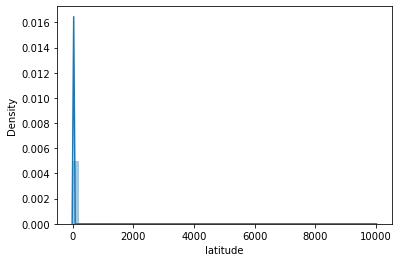

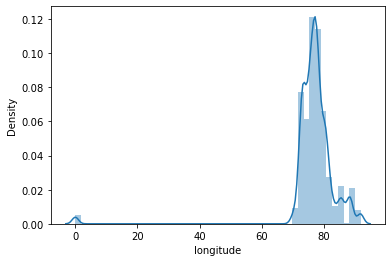

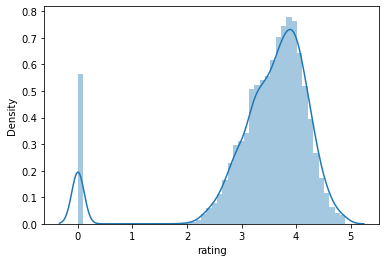

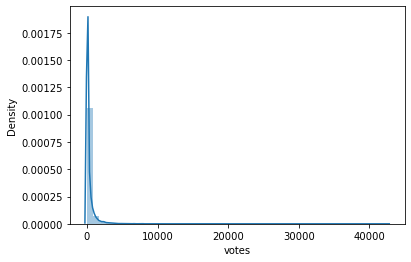

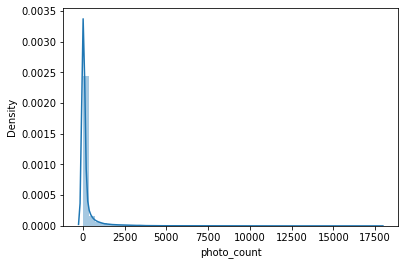

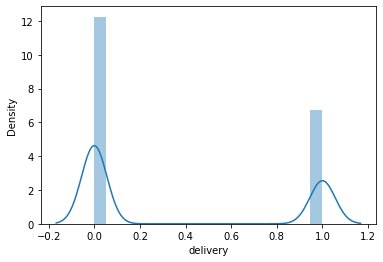

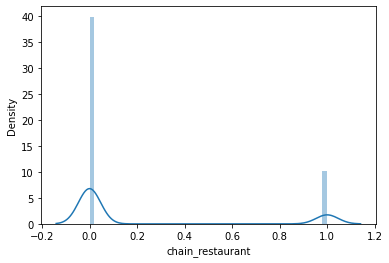

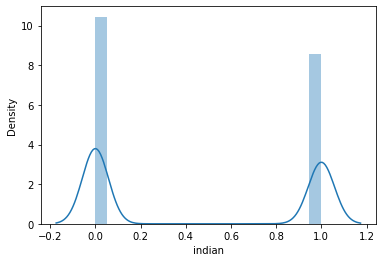

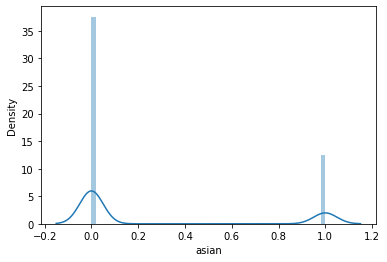

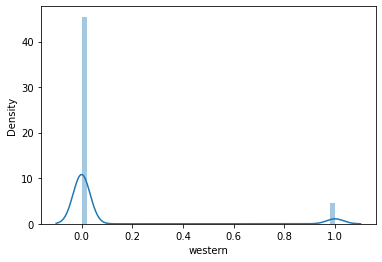

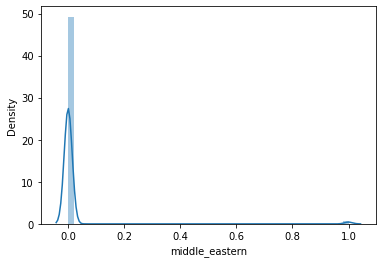

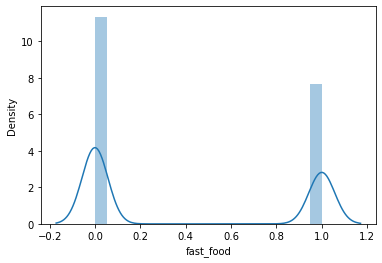

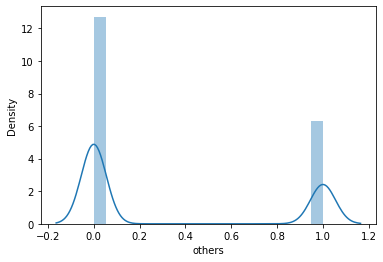

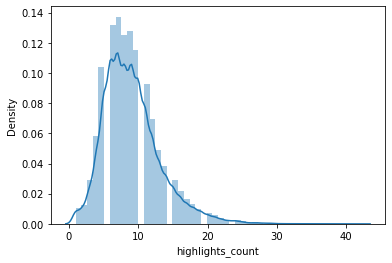

In [615]:
# Printing a dist plot for each of the numerical features to visually check for distributions and outliers
for col in numericals:
    sns.distplot(data[col])
    plt.show()

In [616]:
import plotly.express as px

In [617]:
y=data["type"].value_counts()[:20]
x=y.index
fig=px.bar(x=x,y=y,labels={"x":"Restaurant Types","y":"Number of Restaurant Types"},title="Restaurant Types")
fig.show()

In [618]:
x = data["delivery"].replace({1: "Yes", 0: "No"}).value_counts()
y = x.index
fig = px.pie(values=x, names=y, title="DELIVERY", color_discrete_sequence=px.colors.sequential.YlGnBu)
fig.show()

In [619]:
x=data["city"].value_counts()[:10].sort_values()
y=x.index
fig=px.bar(x=x,y=y,labels={"y":"Cities","x":"Number of Cities"},title="Cities")
fig.show()

In [620]:


fig = px.bar(data[['indian', 'asian', 'western', 'middle_eastern', 'fast_food', 'others']].sum().reset_index(),
             x='index', y=0, color='index', color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title='Distribution of Cuisine Types', xaxis_title='Cuisine Type', yaxis_title='Count')
fig.show()

In [621]:
fig = px.scatter(data_frame=data, x='rating', y='highlights_count')
fig.show()


In [622]:
data.head()

,type,city,latitude,longitude,price_range,rating,votes,photo_count,delivery,area,chain_restaurant,indian,asian,western,middle_eastern,fast_food,others,highlights_count
0,Quick Bites,Agra,27.211450,78.002381,2,4.4,814,154,0,240928,1,1,0,0,0,1,1,8
1,Quick Bites,Agra,27.160569,78.011583,2,4.4,1203,161,0,240928,0,1,1,0,0,1,0,7
2,Quick Bites,Agra,27.182938,77.979684,1,4.2,801,107,1,240928,1,0,0,0,0,1,0,14
3,Quick Bites,Agra,27.205668,78.004799,1,4.3,693,157,1,240928,1,1,0,0,0,1,1,11
4,Casual Dining,Agra,27.157709,78.052421,3,4.9,470,291,1,240928,0,1,0,1,0,0,0,27


In [623]:

# Save clean dataframe to a new  file to be used in further analysis
data.to_csv('clean_creditcardmarketing.csv')